In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kaggle-survey-2020/kaggle_survey_2020_responses.csv
/kaggle/input/kaggle-survey-2020/supplementary_data/kaggle_survey_2020_methodology.pdf
/kaggle/input/kaggle-survey-2020/supplementary_data/kaggle_survey_2020_answer_choices.pdf


# Loading and Cleaning the data
- Column names are a bit wierd and verbose which should be taken care of
- Also, most columns are actuallu options of the same question which it would be helpful to break dwon annd go over each individual question before diving into more complicated inter-patterns within the data.
- The majority of missing values are because of the multi optional questions but they are some uni-option question with missing values that need imputing.

In [6]:
# Loading the reponse Data
res = pd.read_csv('/kaggle/input/kaggle-survey-2020/kaggle_survey_2020_responses.csv', low_memory=False)

# Formating the columns for comfortable access
column_dict = {}
for col in res.columns:
    n_col = col.replace('_Part_', '.')
    n_col = n_col.replace('_', '.')
    n_col = n_col.replace('OTHER', '0')
    column_dict[col] = n_col

res.rename(columns=column_dict, inplace=True)

# Getting the uni-option columns/questions
uo_cols = []
for col in res.columns[1:]:
    if not '.' in col:
        uo_cols.append(col)

In [7]:
def break_down(start_index: int, end_index: int):
    """
        Subsetting the dataframe into questions and binarizing the columns
        
        input: 
            start_index = The start of the subset index
            end_index = The end of the subset index
            
        returns:
            dataframe containing the reponses to a given question
    """
    subset = res.iloc[1:, start_index:end_index].copy()
    
    
    return binary_formatting(subset)

def binary_formatting(df: pd.DataFrame):
    """
        Binarizing the columns, changing the column names
        
        input:
            df = Dataframe to binarize
        
        returns:
            A dataframe of binary columns with answers as their column names
    """
    col_dict = {}
    for col in df.columns:
        val = np.nan
        if pd.isna(df[col].unique()[0]):
            val = df[col].unique()[1]
        else:
            val = df[col].unique()[0]
        
        
        if val == np.nan:
            df[col] = df[col].map({np.nan: 0})
        else:
            df[col] = df[col].map({val: 1, np.nan: 0})
        
        col_dict[col] = val

    df.rename(columns=col_dict, inplace=True)
    
    return df

# Break down of questions

In [8]:
# Question Break downs
language = break_down(7, 20) # Q7
ide = break_down(21, 33) # Q9
host_prod = break_down(33, 47) # Q10
spec_hardware = break_down(48, 52) # Q12: TPU, GPU
viz_lib = break_down(53, 65) # Q14: Which data visualization lib do u use?
ml_lib =  break_down(66, 82) # Q16: Regularly used ML libraries
algo = break_down(83, 94) # Q17: Regularly used ML Algorithms
comp_vision = break_down(94, 101) # Q18: Algorithms related to Computer Vision
nlp = break_down(101, 107) # Q18: Algorithms related to NLP
work_activity = break_down(110, 118) # Q23

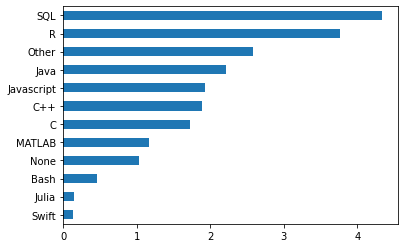

In [86]:
(language.groupby(['Python']).sum()/ language.shape[0] * 100).iloc[0].sort_values().plot.barh()

In [87]:
language.groupby(['Python']).sum()/ language.shape[0] * 100

,R,SQL,C,C++,Java,Javascript,Julia,Swift,Bash,MATLAB,None,Other
Python,,,,,,,,,,,,
0,3.768217,4.332202,1.726892,1.891595,2.216011,1.926532,0.149730,0.134757,0.454182,1.167898,1.028149,2.575364
1,17.578359,33.275105,14.818327,17.209024,14.588740,13.021561,1.157916,0.853464,8.409862,9.897185,0.000000,7.132162


In [79]:
language.groupby(['C']).sum() / language.shape[0] * 100

,Python,R,SQL,C++,Java,Javascript,Julia,Swift,Bash,MATLAB,None,Other
C,,,,,,,,,,,,
0,62.692154,18.097425,30.195648,9.597724,10.521062,10.700739,1.003194,0.728688,6.907566,7.306848,1.028149,8.260132
1,14.818327,3.249152,7.411659,9.502895,6.283689,4.247355,0.304452,0.259533,1.956478,3.758235,0.000000,1.447395


In [82]:
language.groupby(['SQL']).sum() / language.shape[0] * 100

,Python,R,C,C++,Java,Javascript,Julia,Swift,Bash,MATLAB,None,Other
SQL,,,,,,,,,,,,
0,44.235376,9.917149,9.133560,11.065083,7.132162,5.559992,0.633859,0.489120,3.289080,6.862647,1.028149,4.172490
1,33.275105,11.429427,7.411659,8.035536,9.672589,9.388101,0.673787,0.499102,5.574965,4.202436,0.000000,5.535037


In [81]:
language.groupby(['R']).sum() / language.shape[0] * 100

,Python,SQL,C,C++,Java,Javascript,Julia,Swift,Bash,MATLAB,None,Other
R,,,,,,,,,,,,
0,59.932122,26.177880,13.296067,15.706728,13.655420,12.083250,0.678778,0.733679,6.413456,7.845877,1.028149,7.561389
1,17.578359,11.429427,3.249152,3.393891,3.149331,2.864843,0.628868,0.254542,2.450589,3.219205,0.000000,2.146137


In [75]:
language.groupby(['C++']).sum()

,Python,R,SQL,C,Java,Javascript,Julia,Swift,Bash,MATLAB,None,Other
C++,,,,,,,,,,,,
0,12082,3597,5925,1411,2052,2052,196,123,1339,1422,206,1602
1,3448,680,1610,1904,1315,943,66,75,437,795,0,343


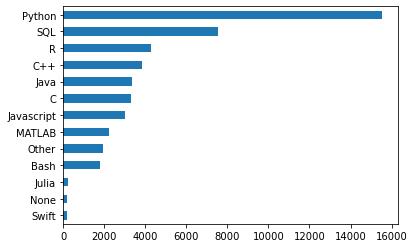

In [31]:
language.sum().sort_values(ascending=True).plot.barh()